<a href="https://colab.research.google.com/github/antonsysoev/comp_tech2025/blob/main/Game_of_Thrones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Серия романов под названием "Песнь Льда и Пламени"  насыщена персонажами и имеет очень плотную паутину событий. Поэтому фанаты могут создавать свои собственные теории и подкреплять их доказательствами из текста. Также автор саги Г.Р.Р. Мартин как-то сказал, что у него в голове был целый сюжет еще до первой строчки романа. Сочинение добавляет к сюжету только детали.

Это дает нам возможность предположить, что в романе существует жесткая структура. Давайте посмотрим, позволяют ли некоторые известные данные данного персонажа узнать, в какой команде он играет в этой жестокой игре.

In [ ]:
install.packages("dplyr")
install.packages("Hmisc")
install.packages("corrplot")
install.packages("scales")
install.packages("fpc")
install.packages("reshape2")
install.packages("ggplot2")
install.packages("NbClust")
install.packages("mclust")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘htmlwidgets’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘Formula’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘modeltools’, ‘DEoptimR’, ‘mclust’, ‘flexmix’, ‘prabclus’, ‘diptest’, ‘robustbase’, ‘kernlab’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-

In [ ]:
library(dplyr)
library(Hmisc)
library(corrplot)
library(scales)
library(fpc)
library(reshape2)
library(ggplot2)
library(NbClust)
library(mclust)


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units


corrplot 0.92 loaded

Package 'mclust' version 6.0.1
Type 'citation("mclust")' for citing this R package in publications.



2 Получение и очистка данных

Прежде всего мы подключаем некоторые библиотеки и считываем данные. Затем мы объединяем два набора данных о персонажах, используя только тех, кто есть в обоих наборах. Этот шаг уменьшает количество наблюдений в конечном наборе данных, но дает нам больше характеристик для каждого наблюдения. Затем мы нормализуем все числа и помечаем каждое наблюдение альянсами.

Наконец, мы удаляем слово "House" из столбца Allegiances, чтобы избежать пар типа "House Baratheon" и "Baratheon".


In [ ]:
char <- read.csv("character-deaths.csv", stringsAsFactors = F)
char.pred <- read.csv("character-predictions.csv", stringsAsFactors = F)

names(char.pred)[which(names(char.pred) == "name")] <- "Name"

some.of.them <- inner_join(char, char.pred, by = "Name")
some.of.them$age[187] <- 20 #Correction of obvious outlier
numb <- some.of.them[, which(sapply(some.of.them,class) != "character")]
numb[is.na(numb)] <- -100
numb <- as.data.frame(scale(numb))
numb <- cbind("Allegiances" = some.of.them$Allegiances, numb)
numb$Allegiances <- gsub("House ", "", numb$Allegiances)

3 Корреляция столбцов

Поскольку мы объединяем два независимых набора, созданных из одного источника, возможны корреляции столбцов. Давайте проверим.

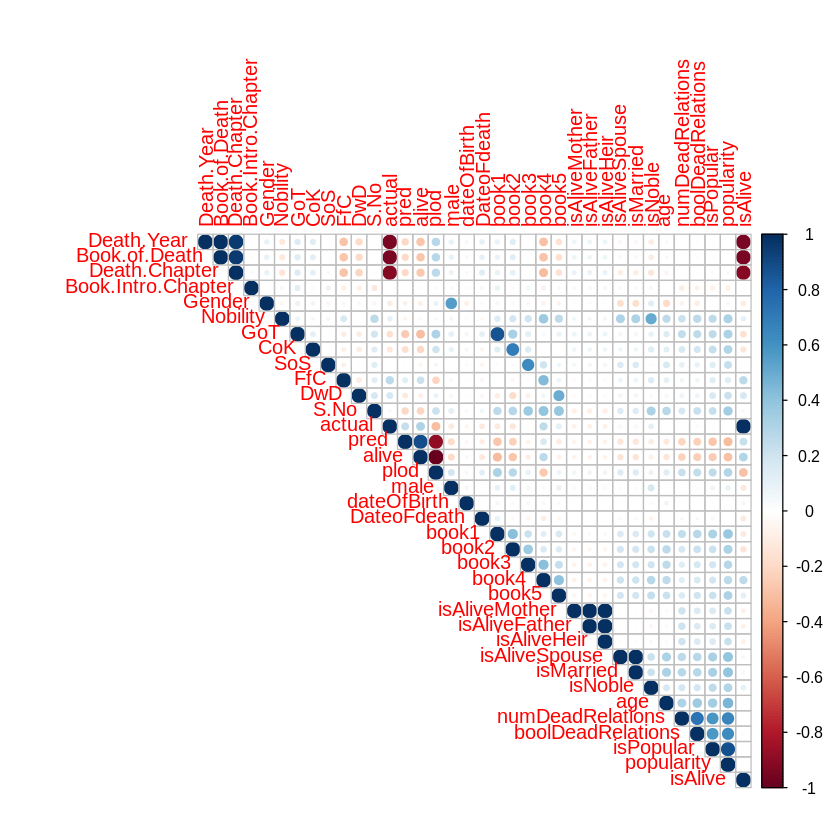

In [ ]:
M <- rcorr(as.matrix(numb[,-1]))
corrplot(M$r, type="upper")